In [2]:
# Import dependencies 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2 as cv
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf 
tf.random.set_seed(1)
from tensorflow import keras 
from keras.datasets import mnist 
from tensorflow.math import confusion_matrix

In [3]:
(X_train , Y_train) , (X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
type(X_test)

numpy.ndarray

In [5]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of Y_train : ",Y_train.shape)
print("Shape of Y_test : ",Y_test.shape)

Shape of X_train :  (60000, 28, 28)
Shape of X_test :  (10000, 28, 28)
Shape of Y_train :  (60000,)
Shape of Y_test :  (10000,)


In [6]:
 print(X_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

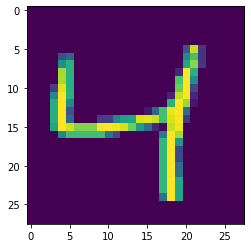

The correspending label : 4


In [7]:
#Display Image Ex
plt.imshow(X_train[2])
plt.show()

print("The correspending label :",Y_train[2])

In [8]:
print("The unique values in Y_train : ",np.unique(Y_train))
print("The unique values in Y_test : ",np.unique(Y_test))

The unique values in Y_train :  [0 1 2 3 4 5 6 7 8 9]
The unique values in Y_test :  [0 1 2 3 4 5 6 7 8 9]


In [9]:
# Normalize the pixels values 
X_train = X_train/255
X_test = X_test/255

In [10]:
print(X_test[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
#Building NN
# Setting up the layers 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation ="relu"),
    keras.layers.Dense(50, activation ="relu"),
    keras.layers.Dense(10,activation = "sigmoid")
])

In [12]:
# Compile the model 
model.compile(optimizer ="adam" , 
              loss = "sparse_categorical_crossentropy" , 
              metrics = ["accuracy"]
              )

In [13]:
#Fitting the model
model.fit(X_train,Y_train , epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3074 - accuracy: 0.9110
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1418 - accuracy: 0.9573
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1052 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0720 - accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0614 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0518 - accuracy: 0.9834
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0463 - accuracy: 0.9856
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0416 - accuracy: 0.9862
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

In [14]:
# Accuracy on training data was nearly 99%
#Accuracy on test data 
loss , accuracy   = model.evaluate(X_test,Y_test)
print("Accuracy on Test Data : ", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0938 - accuracy: 0.9732
Accuracy on Test Data :  0.9732000231742859


In [15]:
#Test the model 
pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


Rand Number Generated :  956


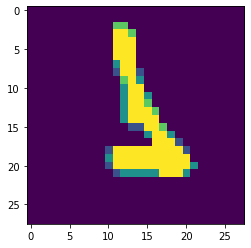

The corresponding label :  1
Predicited label :  1


In [16]:
import random 
n = random.randrange(1000)
print("Rand Number Generated : ",n)
plt.imshow(X_test[n])
plt.show()

print("The corresponding label : ",Y_test[n])

print("Predicited label : " ,np.argmax(pred[n]))

In [17]:
# Get the predicited labels 
pred_labels = [ np.argmax(pr) for pr in pred]
print(pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [18]:
# Building Confusion Matrix 
confusion_mat = confusion_matrix(Y_test , pred_labels)
print(confusion_mat)

tf.Tensor(
[[ 970    0    1    1    0    1    2    0    4    1]
 [   0 1124    2    1    0    1    2    1    4    0]
 [   7    2 1000    2    3    1    2    9    6    0]
 [   0    0    7  979    1    4    0    8    5    6]
 [   1    2    4    1  969    0    1    0    0    4]
 [   3    1    2   11    2  858    5    3    4    3]
 [   9    2    3    1    8    9  921    2    3    0]
 [   2    2    7    1    3    0    0 1001    0   12]
 [   6    0    4    9    3    6    0    4  934    8]
 [   3    3    0    3   13    3    0    7    1  976]], shape=(10, 10), dtype=int32)


Text(0.5, 69.0, 'Predicted Labels')

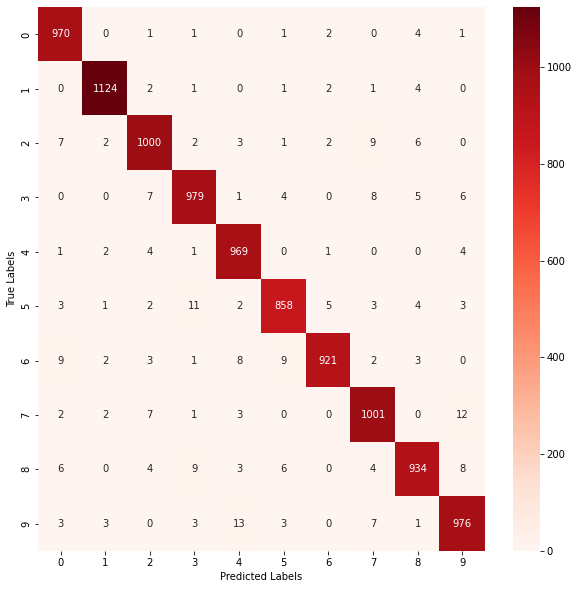

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_mat,annot = True , fmt = "d" , cmap = "Reds")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

In [23]:
# Predictive System 
image_path = "./img_1.jpg"
input_image = cv.imread(image_path)

In [24]:
cv2_imshow(input_image)

In [25]:
input_image.shape

(28, 28, 3)

In [28]:
gray_scaled  = cv.cvtColor(input_image,cv.COLOR_RGB2GRAY)

In [29]:
gray_scaled.shape

(28, 28)

In [38]:
# Resize the image in case it s not 28*28
input_resized = cv.resize(gray_scaled , (28,28))
print(input_resized.shape)
cv2_imshow(input_resized)
#Normalize 
input_resized = input_resized/255
# Reshape 
input_reshaped = np.reshape(input_resized,[1,28,28]) 
predict = model.predict(input_reshaped)
print("The predicted value : ",np.argmax(predict))

(28, 28)


1/1 [==============================] - 0s 155ms/step
The predicted value :  2
